In [1]:
#필요라이브러리 다운로드 
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform 

#한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

#그래프에서 마이너스 표시되게
matplotlib.rcParams['axes.unicode_minus']=False
import matplotlib.pyplot as plt
%matplotlib inline 

import pandas as pd
from sklearn.ensemble import RandomForestRegressor

#시각화 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

#마이너스 기호 출력
plt.rc('axes', unicode_minus=False)

#분석에 문제가 없는 경고 메세지는 숨김
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('movies_train.csv')
test = pd.read_csv('movies_test.csv')

In [3]:
# 데이터 탐색
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [4]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [5]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [6]:
#데이터 전처리

In [7]:
# 결측치가 많은 데이터 제거
train = train.drop(['dir_prev_bfnum'],axis = 1)
test =  test.drop(['dir_prev_bfnum'],axis = 1)

In [8]:
# 감독명 : 너무 다양해서 제거
train = train.drop(['director'],axis = 1)
test = test.drop(['director'],axis = 1)

In [9]:
# 제목 : 의미가 없기 때문에 제거
train = train.drop(['title'],axis= 1)
test = test.drop(['title'],axis= 1)

In [10]:
train.distributor.value_counts()

CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: distributor, Length: 169, dtype: int64

In [11]:
# 상위 5개의 배급사를 제외하고 '기타'로 처리
distributor_list = train.distributor.value_counts()[:5]

def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'
    
train['distributor'] = train['distributor'].apply(lambda x: func(x))
test['distributor'] = test['distributor'].apply(lambda x: func(x))

In [12]:
import datetime

def GetWeekNumber(sourceDate):
    weekNumber = sourceDate.isocalendar()[1]
    return weekNumber

def returnweek(date):
    x = GetWeekNumber(datetime.datetime(int(date[:4]), int(date[5:7]), int(date[8:])))
    return x

In [13]:
train['week'] = train['release_time'].apply(lambda x: returnweek(x))
test['week'] = test['release_time'].apply(lambda x: returnweek(x))
train

,distributor,genre,release_time,time,screening_rat,dir_prev_num,num_staff,num_actor,box_off_num,week
0,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,0,91,2,23398,47
1,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,2,387,3,7072501,47
2,(주)쇼박스,액션,2013-06-05,123,15세 관람가,4,343,4,6959083,23
3,(주)NEW,코미디,2012-07-12,101,전체 관람가,2,20,6,217866,28
4,기타,코미디,2010-11-04,108,15세 관람가,1,251,2,483387,44
...,...,...,...,...,...,...,...,...,...,...
595,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,1,510,7,1475091,33
596,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,1,286,6,1716438,11
597,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,0,123,4,2475,39
598,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,0,431,4,2192525,20


In [14]:
# 개봉일을 바탕으로 년,월 변수 생성
train['year'] = train['release_time'].apply(lambda x: int(x[:4]))
#train['month'] = train['release_time'].apply(lambda x: int(x[5:7]))
train = train.drop(['release_time'], axis = 1)

test['year'] = test['release_time'].apply(lambda x: int(x[:4]))
#test['month'] = test['release_time'].apply(lambda x: int(x[5:7]))
test = test.drop(['release_time'], axis = 1)

In [15]:
train

,distributor,genre,time,screening_rat,dir_prev_num,num_staff,num_actor,box_off_num,week,year
0,롯데엔터테인먼트,액션,96,청소년 관람불가,0,91,2,23398,47,2012
1,(주)쇼박스,느와르,130,청소년 관람불가,2,387,3,7072501,47,2015
2,(주)쇼박스,액션,123,15세 관람가,4,343,4,6959083,23,2013
3,(주)NEW,코미디,101,전체 관람가,2,20,6,217866,28,2012
4,기타,코미디,108,15세 관람가,1,251,2,483387,44,2010
...,...,...,...,...,...,...,...,...,...,...
595,(주)NEW,드라마,111,청소년 관람불가,1,510,7,1475091,33,2014
596,(주)쇼박스,드라마,127,15세 관람가,1,286,6,1716438,11,2013
597,(주)마운틴픽쳐스,공포,99,청소년 관람불가,0,123,4,2475,39,2010
598,CJ 엔터테인먼트,느와르,102,15세 관람가,0,431,4,2192525,20,2015


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


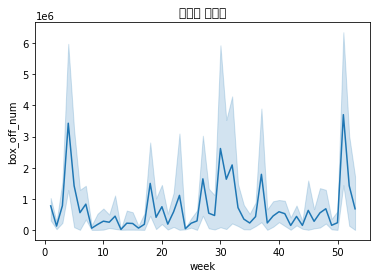

In [16]:
# 월별 관객수 통계
sns.lineplot(x='week',y='box_off_num', data=train)
plt.title('년도별 관객수')
plt.show()

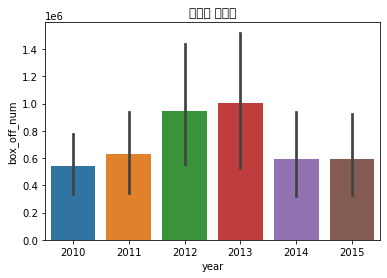

In [17]:
# 월별 관객수 통계
sns.barplot(x='year',y='box_off_num', data=train)
plt.title('년도별 관객수')
plt.show()

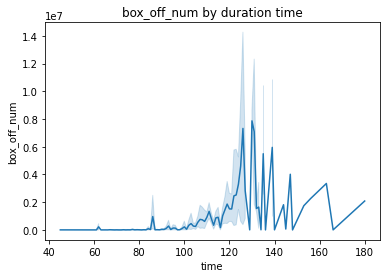

In [20]:
sns.lineplot(x='time',y='box_off_num', data=train)
plt.title('box_off_num by duration time')
plt.show()

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


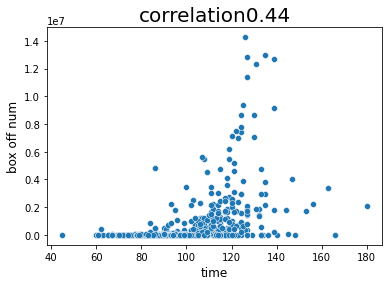

In [21]:
#정규시즌과 프리시즌의 상관관계 계산
correlation = train['time'].corr(train['box_off_num'])
sns.scatterplot(train['time'],train['box_off_num'])
plt.title('correlation' + str(np.round(correlation,2)), fontsize=20)
plt.xlabel('time',fontsize=12)
plt.ylabel('box off num',fontsize=12)
plt.show()

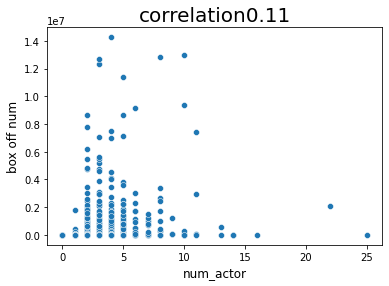

In [22]:
#정규시즌과 프리시즌의 상관관계 계산
correlation = train['num_actor'].corr(train['box_off_num'])
sns.scatterplot(train['num_actor'],train['box_off_num'])
plt.title('correlation' + str(np.round(correlation,2)), fontsize=20)
plt.xlabel('num_actor',fontsize=12)
plt.ylabel('box off num',fontsize=12)
plt.show()

In [23]:
train = train.drop(['num_actor'], axis = 1)
test = test.drop(['num_actor'], axis = 1)

In [ ]:
# 상관관계를 탐색할 변수 선택
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_cols = list(train.select_dtypes(include=numerics))
regular_temp = train[numeric_cols].copy()

# 상관관계 도출
corr_matrix = regular_temp.corr()
corr_matrix = corr_matrix.sort_values(by = 'box_off_num', axis = 0, ascending=False)
corr_matrix = corr_matrix[corr_matrix.index]

# 상관관계의 시각적 표현
f, ax = plt.subplots(figsize=(20, 20))
corr = regular_temp.select_dtypes(exclude=["object","bool"]).corr()

# 대각 행렬을 기준으로 한 쪽만 나타나게 설정해줍니다.
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

g = sns.heatmap(corr_matrix, cmap='RdYlGn_r', vmax= 1, mask=mask, 
center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Diagonal Correlation HeatMap")

In [24]:
# 원핫 인코딩
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   time                    600 non-null    int64
 1   dir_prev_num            600 non-null    int64
 2   num_staff               600 non-null    int64
 3   box_off_num             600 non-null    int64
 4   week                    600 non-null    int64
 5   year                    600 non-null    int64
 6   distributor_(주)NEW      600 non-null    uint8
 7   distributor_(주)마운틴픽쳐스   600 non-null    uint8
 8   distributor_(주)쇼박스      600 non-null    uint8
 9   distributor_CJ 엔터테인먼트   600 non-null    uint8
 10  distributor_기타          600 non-null    uint8
 11  distributor_롯데엔터테인먼트    600 non-null    uint8
 12  genre_SF                600 non-null    uint8
 13  genre_공포                600 non-null    uint8
 14  genre_느와르               600 non-null    uint8
 15  genre_다큐멘터리            

In [29]:
# 모델 정의 및 학습
train_x = train.drop(['box_off_num'],axis= 1)
train_y = train['box_off_num']

In [30]:
model=RandomForestRegressor(n_estimators=100)
model.fit(train_x,train_y)

RandomForestRegressor()

In [31]:
pred = model.predict(test)

In [32]:
submission = pd.read_csv('submission.csv')
submission

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0
...,...,...
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0


In [33]:
submission['box_off_num'] = pred

In [34]:
submission

,title,box_off_num
0,용서는 없다,2789585.52
1,아빠가 여자를 좋아해,1883015.08
2,하모니,1902676.79
3,의형제,2104369.46
4,평행 이론,978133.43
...,...,...
238,해에게서 소년에게,51559.20
239,울보 권투부,12930.09
240,어떤살인,416278.68
241,말하지 못한 비밀,5181.36


In [35]:
submission.to_csv('sub_ver1.csv',index = False)

In [36]:
%%time

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state = 1217)
#모델 학습
rf_model.fit(train_x, train_y)
#예측값 생성
pred_rf = rf_model.predict(test)

CPU times: user 246 ms, sys: 4.59 ms, total: 250 ms
Wall time: 249 ms


In [38]:
%%time

from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state=1217)
#모델학습
xgb_model.fit(train_x, train_y)
#예측값 생성
pred_xgb = xgb_model.predict(test)

CPU times: user 1.64 s, sys: 447 ms, total: 2.09 s
Wall time: 486 ms


In [39]:
%%time

import lightgbm as lgb

lgbm = lgb.LGBMRegressor(random_state=1217)
# 모델 학습
lgbm.fit(train_x, train_y)
# 예측값 생성
pred_lgbm = lgbm.predict(test)

CPU times: user 2.88 s, sys: 724 ms, total: 3.6 s
Wall time: 1.42 s


In [46]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold